# Import librairies

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Import data

In [2]:
path = "../data"
df = pd.read_csv(os.path.join(path,"data_with_missing.csv"),index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## See missing values

In [3]:
def get_percentage_missing_values(df,column):
    value = len(df[(pd.isnull(df[column]))|(df[column]=="Unavailable")])/len(df)
    return(f"{column} has {round(100*value,2)} % missing values \n")
    

In [4]:
for column in df.columns:
    print(get_percentage_missing_values(df,column))

company has 0.0 % missing values 

level has 0.03 % missing values 

title has 0.0 % missing values 

totalyearlycompensation has 0.0 % missing values 

location has 0.0 % missing values 

yearsofexperience has 0.0 % missing values 

yearsatcompany has 0.0 % missing values 

tag has 1.9 % missing values 

basesalary has 0.0 % missing values 

stockgrantvalue has 0.0 % missing values 

bonus has 0.0 % missing values 

gender has 31.81 % missing values 

cityid has 0.0 % missing values 

ID has 0.0 % missing values 

Race has 68.47 % missing values 

Education has 54.98 % missing values 

tag_truncated has 1.9 % missing values 

year has 0.0 % missing values 

country has 0.0 % missing values 



# Data cleaning and processing

In [6]:
features_to_keep = ["company","level","title","location","yearsofexperience","yearsatcompany","gender","year","tag_truncated","country"]
label =["basesalary"]

In [7]:
df = df[features_to_keep+label]

In [8]:
df.loc[df["level"].isin(df["level"].value_counts()[df["level"].value_counts()<=100].keys().tolist()),"level"]="other"

In [9]:
for column in ["tag_truncated"]:
    df[column]=df[column].apply(lambda x: df[column].mode().tolist()[0] if pd.isnull(x) else x)

In [10]:
df["year"]=df["year"].apply(lambda x: x if pd.isnull(x) else x[:4])

In [11]:
df = pd.get_dummies(df, columns=["company","level","title","location","gender","tag_truncated","country","year"])

In [12]:
df = df[df["basesalary"]!=0]

In [13]:
df.head()

,yearsofexperience,yearsatcompany,basesalary,company_AMD,company_Accenture,company_Adobe,company_Airbnb,company_Amazon,company_American Express,company_Apple,...,tag_truncated_others,country_Canada,country_Germany,country_US,country_United Kingdom,year_2017,year_2018,year_2019,year_2020,year_2021
0,1.5,1.5,107000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,8.0,0.0,155000.0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,7.0,5.0,157000.0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
6,15.0,11.0,180000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7,4.0,4.0,135000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [14]:
df.to_csv("../data/cleaned_dataset.csv")

# Analysis of highly correlated variables

In [66]:


X=df[["stockgrantvalue"]]
y=df["basesalary"]

mod = sm.OLS(y,X)
sales_regression = mod.fit()
#sales_regression = sm.OLS(y,X).fit()

sales_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             basesalary   R-squared (uncentered):                   0.500
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                          3.537e+04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                        0.00
Time:                        11:50:58   Log-Likelihood:                     -4.6099e+05
No. Observations:               35324   AIC:                                  9.220e+05
Df Residuals:                   35323   BIC:                                  9.220e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
stockgrantvalue     0.9585      0.005    188.073      0.000       0.948       0.968
==============================================================================
Omnibus:                    30301.362   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5884714.248
Skew:                          -3.402   Prob(JB):                         0.00
Kurtosis:                      65.864   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

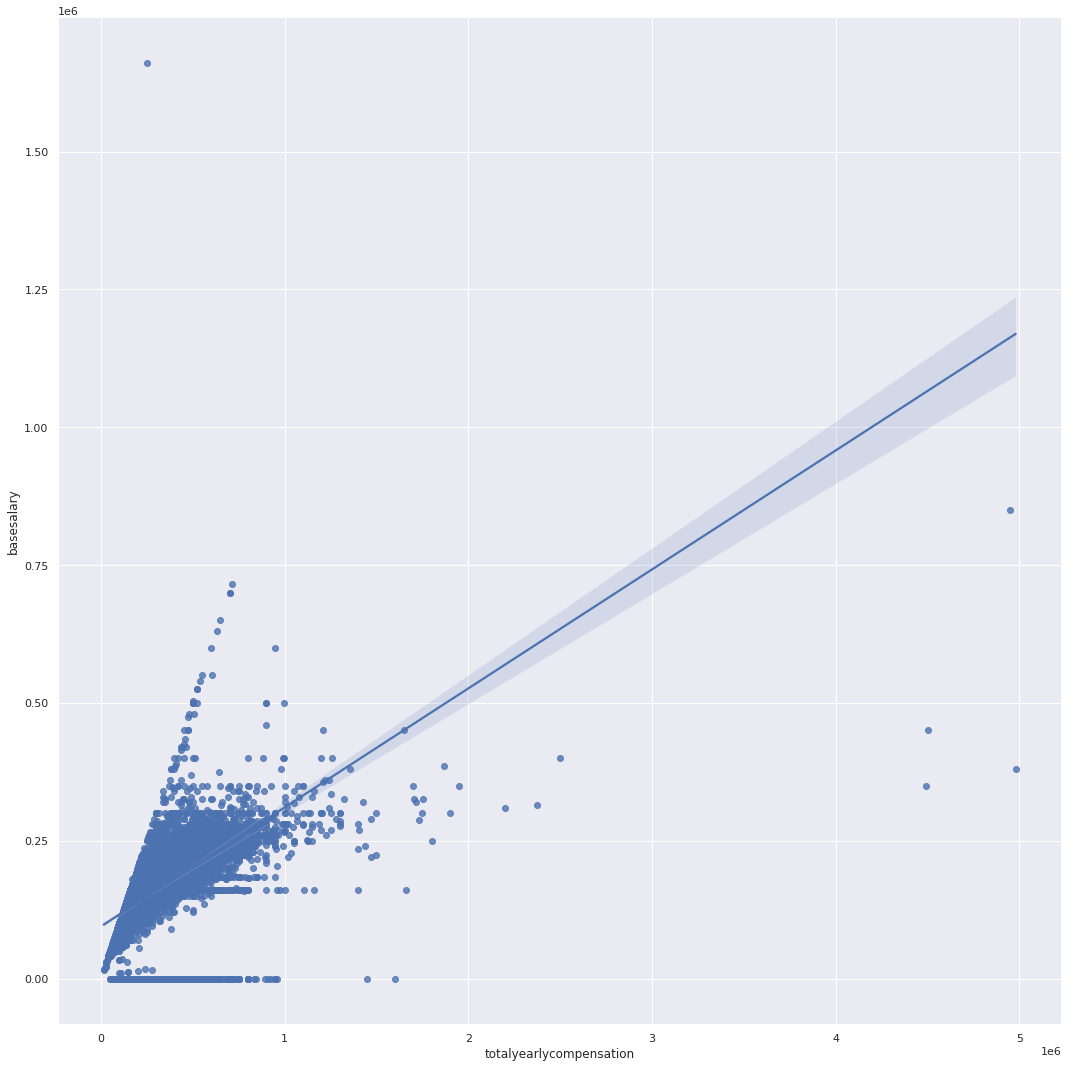

In [82]:
# Set seaborn theme
sns.set_theme()

# Subplot
#fig, ax = plt.subplots(1)
sns.lmplot(x="totalyearlycompensation",y="basesalary",data=df,height=15)

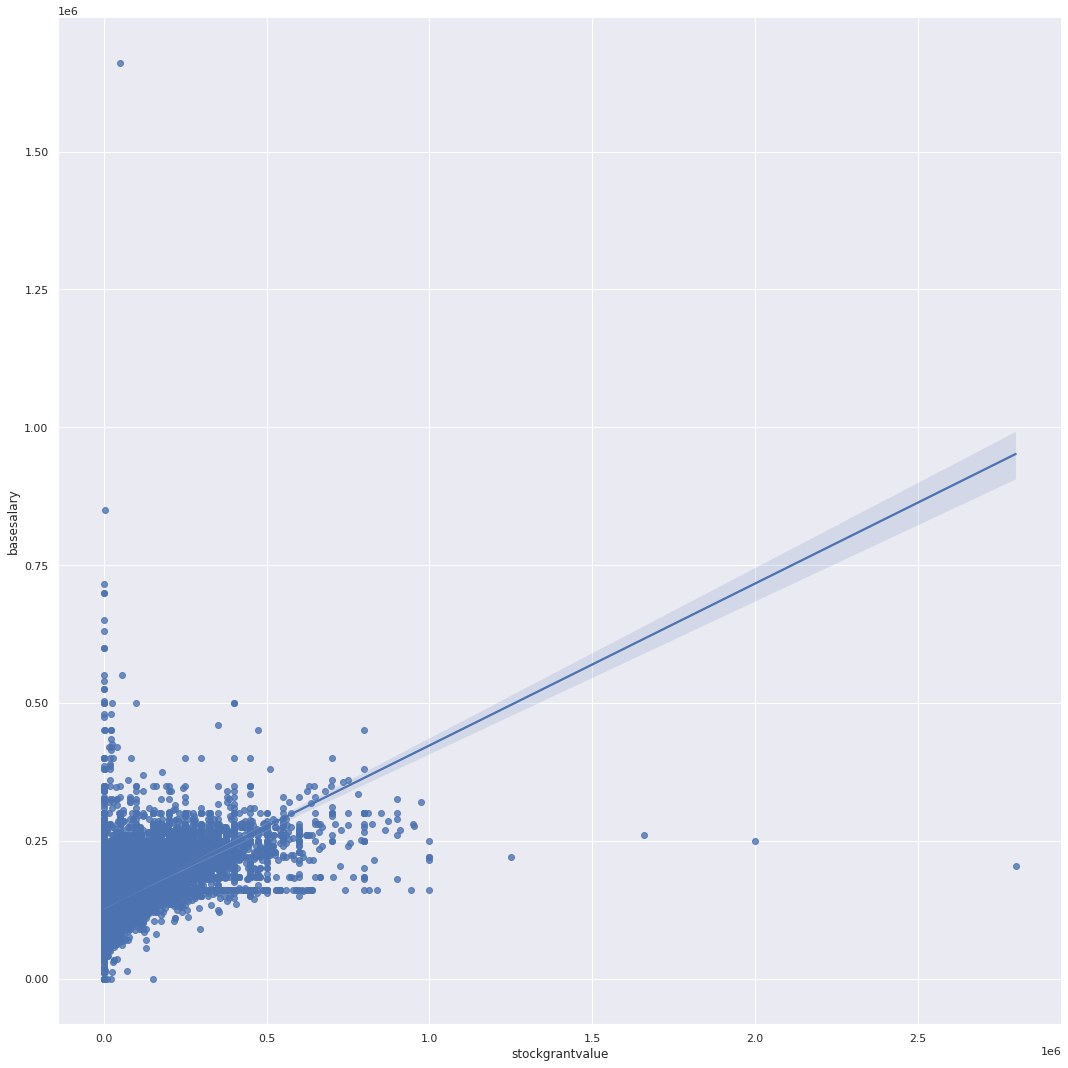

In [83]:
# Set seaborn theme
sns.set_theme()

# Subplot
#fig, ax = plt.subplots(1)
sns.lmplot(x="stockgrantvalue",y="basesalary",data=df,height=15)